# FILTER

Продолжим работать с табличкой `employees`:

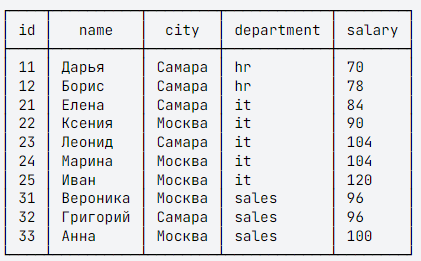

### 31 Сравнить з/п со средней по городу

Есть таблица сотрудников `employees`. Для каждого сотрудника мы посчитали, сколько процентов составляет его зарплата от средней по компании:

In [ ]:
SELECT id, 
       name, 
       salary,
       ROUND(salary * 100 / AVG(salary) OVER ()) AS perc
  FROM employees
 ORDER BY id

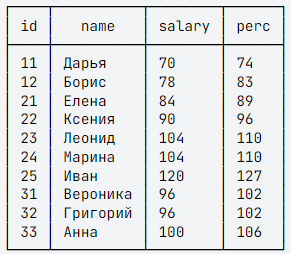

А теперь еще хотим посчитать, сколько процентов составляет зарплата сотрудника от средней по Москве и средней по Самаре. Должно получиться так:

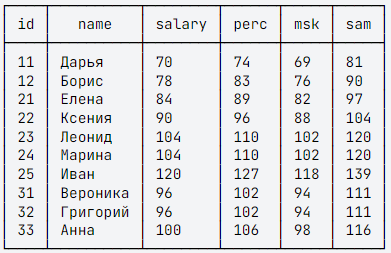

Напишите запрос, который это сделает.

Сортировка результата: id

In [ ]:
SELECT id, 
       name, 
       salary,
       ROUND(salary * 100 / AVG(salary) OVER ()) AS perc,
       ROUND(salary * 100 / AVG(salary) FILTER(WHERE city = 'Москва') OVER ()) AS msk,
       ROUND(salary * 100 / AVG(salary) FILTER(WHERE city = 'Самара') OVER ()) AS sam
  FROM employees
 ORDER BY id

### 32 FILTER → CASE

Есть запрос, который считает зарплатный фонд города без учета IT-отдела:

In [ ]:
SELECT name, 
       city,
       SUM(salary) OVER w AS base,
       SUM(salary) FILTER(WHERE department <> 'it') OVER w AS no_it
  FROM employees
WINDOW w AS (PARTITION BY city)
 ORDER BY city, id

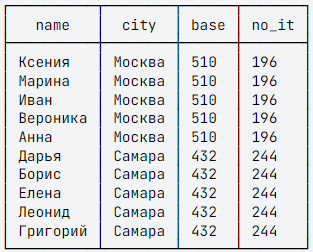

Перепишите запрос так, чтобы он использовал case вместо filter.

In [ ]:
SELECT name,
       city,
       SUM(salary) OVER w AS base,
       SUM(CASE WHEN department <> 'it' THEN salary ELSE 0 END) OVER w AS no_it 
  FROM employees
WINDOW w AS (PARTITION BY CITY)
 ORDER BY city, id

### 33 Меньше ИТ, больше HR

Есть запрос, который считает зарплатный фонд города:

In [ ]:
SELECT name, 
       city,
       SUM(salary) OVER w AS base
  FROM employees
WINDOW w AS (PARTITION BY city)
 ORDER BY city, id

Добавьте столбец alt с зарплатным фондом, рассчитанным по следующим правилам:

- для сотрудников отдела hr умножаем зарплату на 2;
- для сотрудников отдела it делим зарплату на 2;
- для сотрудников отдела sales не меняем зарплату.

Должно получиться так:

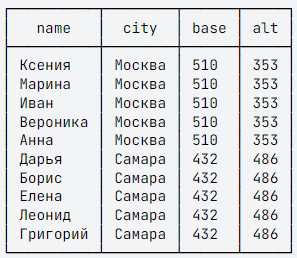

Напишите запрос, который это сделает.

In [ ]:
SELECT name,
       city,
       SUM(salary) OVER w AS base,
       SUM(CASE WHEN department = 'hr' then salary * 2
                WHEN department = 'it' then salary / 2
                WHEN department = 'sales' then salary END) AS alt
  FROM employees
WINDOW w AS (PARTITION BY city)
 ORDER by city, id